## Линейная модель

Линейная модель - это математическая модель, используемая в машинном обучении для предсказания значений на основе линейной комбинации входных признаков. Она предполагает, что выходное значение (прогноз) можно выразить как взвешенную сумму входных признаков с добавлением смещения (bias). Математически это можно записать следующим образом:


$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$

где:
- $\hat{y}$ - прогнозируемое значение,
- $w_1, w_2, \ldots, w_n$ - веса (параметры) модели для каждого признака,
- $x_1, x_2, \ldots, x_n$ - входные признаки,
- $b$ - смещение (bias).

### Вычисление выхода линейной модели

Для вычисления выхода линейной модели, просто подставьте значения признаков в уравнение, используя соответствующие веса и смещение. Матричная формула для вычисления выхода линейной модели для набора данных \(X\) выглядит следующим образом:

$\hat{Y} = X \cdot \mathbf{w} + b$

где:
- $\hat{Y}$ - вектор прогнозов для всего набора данных,
- $X$ - матрица признаков, где каждая строка представляет один образец, а столбцы - признаки,
- $\mathbf{w}$ - вектор весов модели,
- $b$ - смещение (bias).

### Обучение линейной модели

Обучение линейной модели заключается в настройке параметров (весов и смещения) так, чтобы они наилучшим образом соответствовали обучающим данным. Одним из наиболее распространенных методов обучения линейной модели является градиентный спуск.

### Градиентный спуск

Градиентный спуск - это метод оптимизации, используемый для обновления параметров модели с целью минимизации функции потерь. Функция потерь оценивает, насколько хорошо модель предсказывает реальные значения на обучающих данных.

Для линейной регрессии, часто используется среднеквадратичная ошибка (Mean Squared Error - MSE) в качестве функции потерь:

$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - реальное значение для i-го примера,
- $\hat{y}_i$ - прогнозированное значение для i-го примера.

### Корректировка весов модели

Для обновления весов модели в методе градиентного спуска, используется градиент функции потерь по отношению к параметрам модели. Градиент показывает направление наибольшего увеличения функции потерь, поэтому мы двигаемся в противоположном направлении градиента, чтобы уменьшить потери. Формула для обновления весов выглядит следующим образом:

$\mathbf{w}_{\text{новые}} = \mathbf{w}_{\text{старые}} - \text{learning_rate} \cdot \nabla L$

где:
- $\mathbf{w}_{\text{новые}}$ - новые веса после обновления,
- $\mathbf{w}_{\text{старые}}$ - текущие веса,
- $\text{learning_rate}$ - скорость обучения (коэффициент, контролирующий размер шага градиентного спуска),
- $\nabla L$ - градиент функции потерь по параметрам модели.

Этот процесс повторяется до достижения сходимости или определенного числа итераций.

## Классификатор на линейной модели

На линейной модели можно построить и классификатор. Для этого нужно выход линейной модели отбразить в интервал от 0 до 1. В этом нам поможет логистическая функция:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Для обучения скорректируем функцию потерь. Нетрудно показать, что функция, называемая кросс-энтропией на самом деле соответствует максимизации правдоподобия (кстати, почитайте про правдоподобие), ниже представлено выражение для нее

$BCE = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - истинная метка класса (0 или 1) для i-го примера,
- $\hat{y}_i$ - вероятность принадлежности к классу 1 для i-го примера (выход сигмоидной функции).

Будем считать, что модель относит объект к 1 классу, если ее выход $>=0.5$, иначе - 0 класс.

## Как считать градиенты

Приведу градиент для кросс-энтропии:

$\nabla_{\mathbf{w}} \text{BCE} = -\frac{1}{N} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$

Для MSE вычислить градиент самостоятельно

In [599]:
import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self, num_features):
        # Инициализация модели с заданным количеством признаков
        self.num_features = num_features
        self.weights = np.zeros(num_features)  # Веса модели инициализируются нулями
        self.bias = 0.0  # Смещение инициализируется нулем

    def __call__(self, X):
        # Вычисление линейной комбинации признаков
        return np.dot(X, self.weights) + self.bias

class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.1, epochs=10):
        # Обучение линейной регрессии методом градиентного спуска
        error_history = []
        for _ in range(epochs):
            predictions = self(X)  # Предсказания модели
            error = y - predictions  # Ошибка между предсказаниями и истинными значениями
            gradient = -2 * np.dot(X.T, error) / len(y)  # Градиент по весам
            self.weights -= learning_rate * gradient  # Обновление весов
            self.bias -= learning_rate * np.mean(error)  # Обновление смещения
            current_error = ((y - predictions) ** 2).mean()  # Среднеквадратичная ошибка
            error_history.append(current_error)  # Сохранение ошибки для анализа
        return error_history

    def predict(self, X):
        # Предсказание значений для новых данных
        return self(X)

class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.00302, epochs=30):
        # Обучение линейного классификатора методом градиентного спуска
        error_history = []
        for _ in range(epochs):
            predictions = self(X)  # Линейная комбинация признаков
            sigmoid = 1 / (1 + np.exp(-predictions))  # Сигмоидная функция
            error = y - sigmoid  # Ошибка между предсказаниями и истинными значениями
            gradient = -np.dot(X.T, error) / len(y)  # Градиент по весам
            self.weights -= learning_rate * gradient  # Обновление весов
            self.bias -= learning_rate * np.mean(error)  # Обновление смещения
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))  # Логистическая ошибка
            error_history.append(current_error)  # Сохранение ошибки для анализа
        return error_history

    def predict(self, X):
        # Предсказание классов (0 или 1) для новых данных
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return np.round(sigmoid)

    def predict_proba(self, X):
        # Вычисление вероятностей классов для новых данных
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return sigmoid


## Проверьте модели на данных

### Линейная модель

#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:

- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [600]:
import pandas as pd

In [601]:
data = pd.read_csv('Student_Performance.csv')
print(data.head())

Y = data['Performance Index']
X = data.drop(columns=['Performance Index'])
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
X = X.to_numpy()
# Вычислите среднее по столбцам.
mean = X.mean(axis=0)

# Вычислите стандартное отклонение по столбцам.
std = X.std(axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

# Нормализуйте и выходные данные
normalized_Y = (Y - Y.mean()) / Y.std()

# Инициализация и обучение линейной регрессии
lr = LinearRegressor(num_features=normalized_X.shape[1])
history = lr.fit(normalized_X, normalized_Y)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


C:\Users\Господин\AppData\Local\Temp\ipykernel_10392\8686369.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


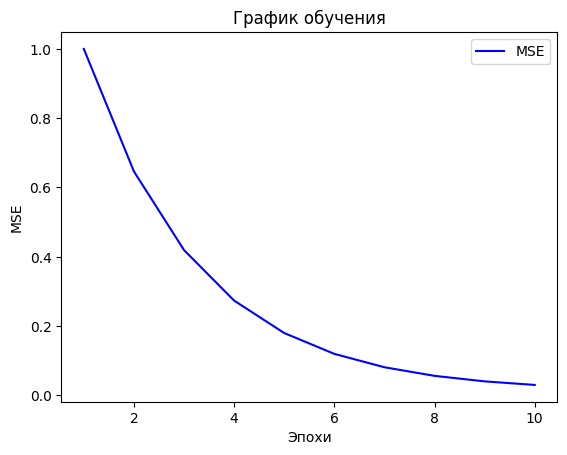

In [602]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

### Классификатор
#### Context
When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

Account Balance: No account (1), None (No balance) (2), Some Balance (3)

Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

No of Credits at this bank: 1, More than 1

Guarantor: None, Yes

Concurrent Credits: Other Banks or Dept Stores, None

ForeignWorker variable may be dropped from the study

Purpose of Credit: New car, Used car, Home Related, Other

In [588]:
data = pd.read_csv('german.csv', sep=';')
# print(data.head())
Y = data['Creditability']  # Целевая переменная
X = data.drop(columns=['Creditability', 'Foreign_Worker']) # Удаляем ненужный столбец
# Вычислите среднее по столбцам.
mean = X.mean(axis=0)

# Вычислите стандартное отклонение по столбцам.
std = X.std(axis=0)

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std
lc = LinearClassifier(num_features=normalized_X.shape[1])
history = lc.fit(normalized_X, Y)
normalized_X

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone
0,-1.253938,-0.240737,1.343342,-0.301701,-0.787263,-0.699357,-1.145405,0.918018,-0.963168,-0.303534,1.046463,-0.340885,-1.280932,0.460600,-1.750329,-0.704573,0.146876,-0.428075,-0.822906
1,-1.253938,-0.987079,1.343342,-1.030447,-0.167301,-0.699357,-0.317800,-0.869748,0.449102,-0.303534,-0.765594,-1.293076,0.040343,0.460600,-1.750329,1.026565,0.146876,2.333701,-0.822906
2,-0.458797,-0.738298,-0.503176,2.248911,-0.860950,-0.066455,0.509805,-0.869748,-0.963168,-0.303534,1.046463,-1.293076,-1.104762,0.460600,-1.750329,-0.704573,-1.383079,-0.428075,-0.822906
3,-1.253938,-0.738298,1.343342,-1.030447,-0.407137,-0.699357,-0.317800,0.024135,0.449102,-0.303534,-0.765594,-1.293076,0.304598,0.460600,-1.750329,1.026565,-1.383079,2.333701,-0.822906
4,-1.253938,-0.738298,1.343342,-1.030447,-0.389779,-0.699357,-0.317800,0.918018,0.449102,-0.303534,1.046463,-0.340885,0.216513,-2.373863,0.135801,1.026565,-1.383079,-0.428075,-0.822906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.253938,0.256825,-0.503176,0.062672,-0.454963,-0.699357,-0.317800,-0.869748,0.449102,-0.303534,1.046463,-1.293076,-1.280932,0.460600,-1.750329,-0.704573,-1.383079,2.333701,-0.822906
996,-1.253938,0.256825,-0.503176,-1.030447,-0.343016,-0.699357,1.337409,0.918018,0.449102,1.789803,-1.671623,-1.293076,0.833108,0.460600,0.135801,-0.704573,0.146876,-0.428075,-0.822906
997,1.131486,0.008044,1.343342,-1.030447,3.333184,1.832252,1.337409,0.918018,0.449102,-0.303534,1.046463,1.563498,-0.488167,0.460600,2.021932,-0.704573,1.676831,-0.428075,1.213990
998,-0.458797,-0.738298,-0.503176,0.062672,1.132495,1.832252,-1.973010,-0.869748,0.449102,-0.303534,-1.671623,1.563498,1.449703,0.460600,0.135801,-0.704573,1.676831,-0.428075,1.213990


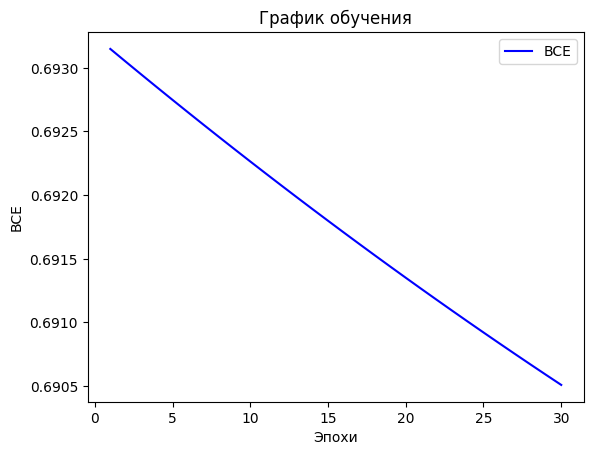

In [589]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='BCE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('BCE')
plt.legend()

# Отобразите график.
plt.show()

In [590]:
pred = lc.predict(normalized_X)
print('accuracy: ', (pred == Y).sum() / len(Y))

accuracy:  0.553


Вычислите для этой модели ROC-AUC, precision, recall и f1

In [591]:
# Вычисление метрик
accuracy = (pred == Y).sum() / len(Y)
roc_auc = roc_auc_score(Y, lc.predict_proba(normalized_X))
precision = precision_score(Y, pred)
recall = recall_score(Y, pred)
f1 = f1_score(Y, pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.553
ROC-AUC: 0.7912285714285714
Precision: 0.9174917491749175
Recall: 0.39714285714285713
F1 Score: 0.5543369890329013
